In [1]:
import os
from google.cloud import bigquery
import pandas as pd 

In [2]:
#set environment
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= '/Users/jordanmaulino/Downloads/coastal-dynamo-309722-2032fe38e9cd.json'

In [3]:
client = bigquery.Client()

In [4]:
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

dataset=client.get_dataset(dataset_ref)

In [5]:
tables = list(client.list_tables(dataset))

In [6]:
for table in tables: 
    print(table.table_id)

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


Let's first take a look at the languages table

In [7]:
table_ref = dataset_ref.table("languages")

table=client.get_table(table_ref)

In [8]:
client.list_rows(table, max_results=5).to_dataframe()

,repo_name,language
0,Zycon42/philosophers,"[{'name': 'C', 'bytes': 13561}]"
1,penguin418/simple-ATM,"[{'name': 'C', 'bytes': 880}]"
2,thoferon/mule,"[{'name': 'C', 'bytes': 8676}]"
3,mikesouthron/CClojure,"[{'name': 'C', 'bytes': 102431}]"
4,hildjj/mgrep,"[{'name': 'C', 'bytes': 12652}]"


In [9]:
table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, (), None)), None)]

Now, let's find the most popular programming languages on Github.

In [12]:
popular_languages_query = """
                    SELECT language.name as language_name, COUNT(*) AS num_repos
                    FROM `bigquery-public-data.github_repos.languages`,
                        UNNEST(language) AS language
                    GROUP BY language_name
                    ORDER BY num_repos DESC
                    """

query_job = client.query(popular_languages_query)

pop_lang = query_job.to_dataframe()

pop_lang.head()

,language_name,num_repos
0,JavaScript,1102722
1,CSS,816575
2,HTML,781471
3,Shell,639347
4,Python,549816


In [15]:
pop_lang

,language_name,num_repos
0,JavaScript,1102722
1,CSS,816575
2,HTML,781471
3,Shell,639347
4,Python,549816
...,...,...
412,Blade,1
413,Slim,1
414,ZAP,1
415,ImageJ Macro,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Since there's over 400 programming languages listed, let's take a look at just the top 10

Text(0.5, 1.0, 'Top 10 Most Popular Languages on Github (by # of Repositories)')

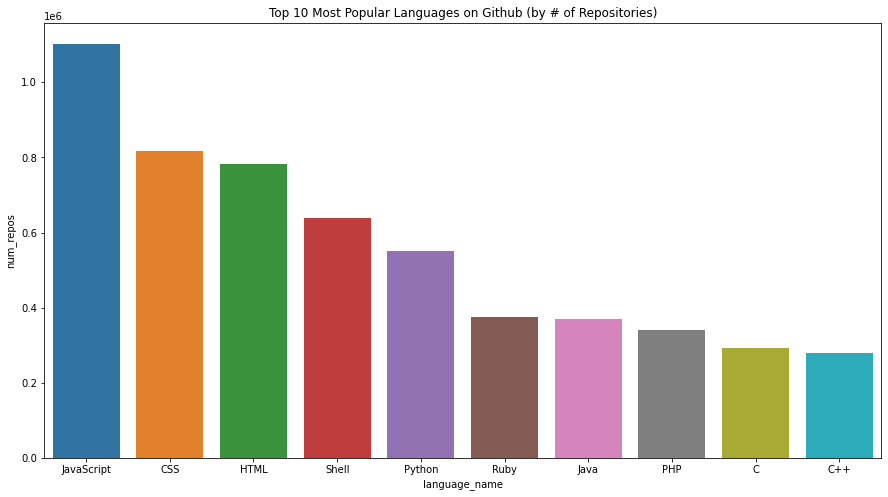

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(x="language_name", y="num_repos", data=pop_lang.loc[0:9])
plt.title("Top 10 Most Popular Languages on Github (by # of Repositories)")